###Librerie

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
import urllib.parse
from dateutil.relativedelta import relativedelta
from datetime import datetime

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


###Funzioni

In [28]:
response = requests.get("https://api.github.com/repos/InvestitoreComune/historical_data/git/trees/main?recursive=1")
json_response = json.loads(response.text)
df=[]
for branch in json_response["tree"]:
  if "csv" in branch["path"]:
    nome_file = "https://raw.githubusercontent.com/InvestitoreComune/historical_data/main/" + urllib.parse.quote(branch["path"])
    print(nome_file)
    df.append(pd.read_csv(nome_file,index_col=0,skiprows=1,header=0,names=["Date",nome_file[nome_file.rfind("/")+1:-4].replace("%20"," ").upper()]))

https://raw.githubusercontent.com/InvestitoreComune/historical_data/main/bonds/csbgu7.csv
https://raw.githubusercontent.com/InvestitoreComune/historical_data/main/bonds/ibc1.csv
https://raw.githubusercontent.com/InvestitoreComune/historical_data/main/bonds/is0f.csv
https://raw.githubusercontent.com/InvestitoreComune/historical_data/main/bonds/sxrq.csv
https://raw.githubusercontent.com/InvestitoreComune/historical_data/main/bonds/x13e.csv
https://raw.githubusercontent.com/InvestitoreComune/historical_data/main/bonds/x25e.csv
https://raw.githubusercontent.com/InvestitoreComune/historical_data/main/bonds/x35e.csv
https://raw.githubusercontent.com/InvestitoreComune/historical_data/main/bonds/xgle.csv
https://raw.githubusercontent.com/InvestitoreComune/historical_data/main/commodities/cmod.csv
https://raw.githubusercontent.com/InvestitoreComune/historical_data/main/commodities/sgld.csv
https://raw.githubusercontent.com/InvestitoreComune/historical_data/main/indexes/msci%20world.csv
https://

In [29]:
dati=pd.concat(df,axis=1).sort_values(by="Date")
dati=dati.iloc[:,~dati.columns.duplicated()]
dati.fillna(method="ffill",limit=6,inplace=True)
dati.index = pd.to_datetime(dati.index,format='%Y-%m')#+pd.offsets.MonthEnd()

In [30]:
def massimo(t,ribasso):
  # Inizializzazione della colonna per i mesi al ribasso del 10%
  t[f'Mesi al ribasso {round(ribasso*100)}%'] = pd.NA

  # Iterazione attraverso il DataFrame per trovare i ribassi del 10% dai massimi progressivi
  for i in range(len(t)):
      # Controlla se il punto attuale è un massimo progressivo
      if t.iloc[i][ticker] == t.iloc[i]['Massimo cumulativo']:
          # Cerca il primo ribasso dopo il massimo progressivo
          for j in range(i+1, len(t)):
              if abs(t.iloc[j]['Drawdown']) >= ribasso:
                  # Calcola il numero di mesi tra il massimo e il ribasso
                  t.at[t.index[i], f'Mesi al ribasso {round(ribasso*100)}%'] = j - i
                  break

  return(t)

In [31]:
def output():
  x = titolo[(titolo['Rendimento dai massimi'].notna()) & (titolo['Capitale a scadenza dai massimi']<titolo['Capitale a scadenza calo 10%'])].iloc[:,4].mean()
  print(f'Media mesi dove attesa calo 10% garantisce capitale maggiore a scadenza di investire sui massimi: {round(x,2)} mesi')
  x = titolo[(titolo['Rendimento dai massimi'].notna()) & (titolo['Capitale a scadenza dai massimi']<titolo['Capitale a scadenza calo 20%'])].iloc[:,5].mean()
  print(f'Media mesi dove attesa calo 30% garantisce capitale maggiore a scadenza di investire sui massimi: {round(x,2)} mesi')
  x = titolo[(titolo['Rendimento dai massimi'].notna()) & (titolo['Capitale a scadenza dai massimi']<titolo['Capitale a scadenza calo 30%'])].iloc[:,6].mean()
  print(f'Media mesi dove attesa calo 30% garantisce capitale maggiore a scadenza di investire sui massimi: {round(x,2)} mesi')
  x = round(titolo[(titolo['Rendimento dai massimi'].notna()) & (titolo['Capitale a scadenza dai massimi']<titolo['Capitale a scadenza calo 10%'])].iloc[:,0].count()/titolo[(titolo['Rendimento dai massimi'].notna())].iloc[:,0].count(),4)*100
  print(f'Casistiche nelle quali aspettare un ribasso del 10% avrebbe garantito un capitale a scadenza maggiore: {round(x,2)}%')
  x = round(titolo[(titolo['Rendimento dai massimi'].notna()) & (titolo['Capitale a scadenza dai massimi']<titolo['Capitale a scadenza calo 20%'])].iloc[:,0].count()/titolo[(titolo['Rendimento dai massimi'].notna())].iloc[:,0].count(),4)*100
  print(f'Casistiche nelle quali aspettare un ribasso del 20% avrebbe garantito un capitale a scadenza maggiore: {round(x,2)}%')
  x = round(titolo[(titolo['Rendimento dai massimi'].notna()) & (titolo['Capitale a scadenza dai massimi']<titolo['Capitale a scadenza calo 30%'])].iloc[:,0].count()/titolo[(titolo['Rendimento dai massimi'].notna())].iloc[:,0].count(),4)*100
  print(f'Casistiche nelle quali aspettare un ribasso del 30% avrebbe garantito un capitale a scadenza maggiore: {round(x,2)}%')

#Elaborazione

In [103]:
#ticker = '^GSPC'
#dati = yf.download(ticker)['Adj Close']
#dati = pd.DataFrame(dati.resample('M').last().dropna())
#dati = dati.rename(columns={'Adj Close': ticker})

In [104]:
ticker = 'MSCI WORLD'
periodo = 30 # durata portafogli
capitale = 10000

In [105]:
titolo = pd.DataFrame(dati[ticker].dropna())
titolo['Massimo cumulativo'] = titolo[ticker].cummax()
titolo['Check'] = titolo[ticker] >= titolo['Massimo cumulativo']
titolo['Drawdown'] = (titolo[ticker] - titolo['Massimo cumulativo']) / titolo['Massimo cumulativo']
titolo = massimo(titolo,.10)
titolo = massimo(titolo,.20)
titolo = massimo(titolo,.30)

In [106]:
print('% di mesi nei quali è stato raggiunto un nuovo massimo')
round(titolo['Check'].sum()/titolo['Check'].count(),4)*100

% di mesi nei quali è stato raggiunto un nuovo massimo


21.990000000000002

In [107]:
print('% di mesi nei quali il mercato scambia ad un ribasso inferiore al 10% da ultimo massimo')
round(titolo[titolo['Drawdown']>-.1][ticker].count()/titolo[ticker].count(),4)*100

% di mesi nei quali il mercato scambia ad un ribasso inferiore al 10% da ultimo massimo


58.91

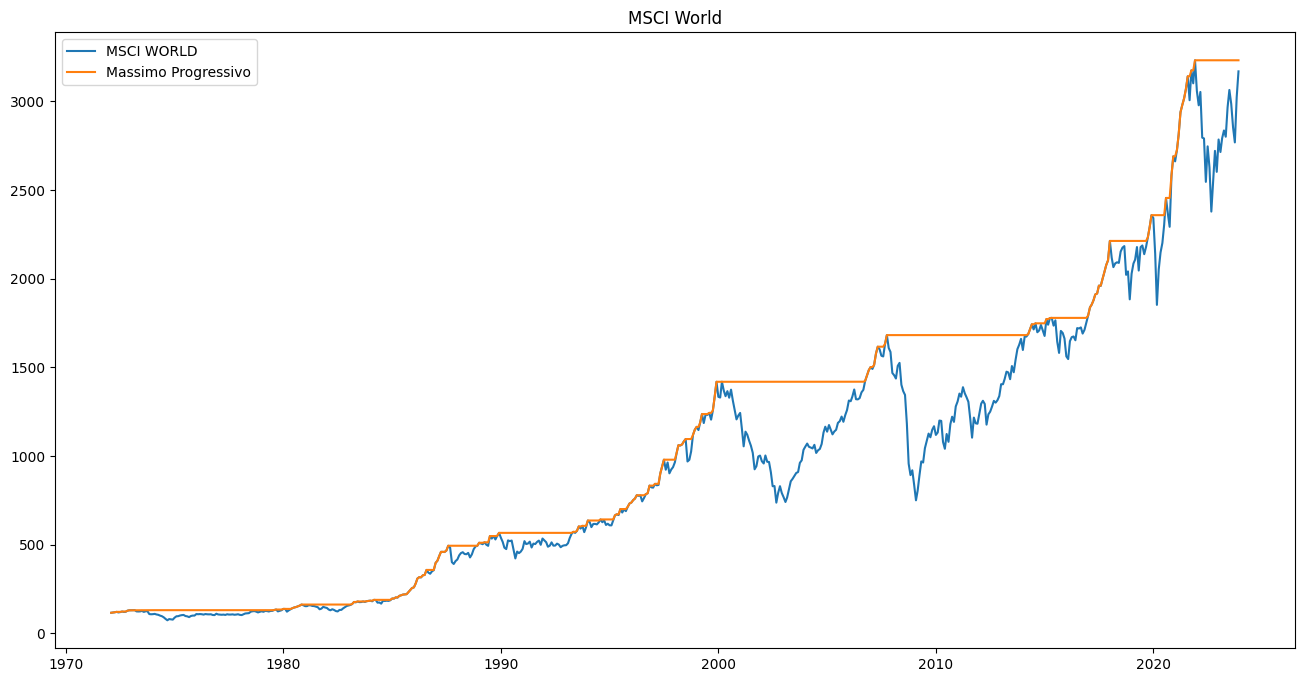

In [108]:
plt.figure(figsize=(16,8))
plt.plot(titolo.iloc[:,0],label=ticker)
plt.plot(titolo.iloc[:,1],label='Massimo Progressivo')
plt.legend()
plt.title('MSCI World')
plt.show()

##Analisi portafogli

In [109]:
for m in titolo[(titolo['Check']) & (titolo.index<titolo.index.max()-relativedelta(months=12*periodo))].index:
  subdf = titolo[ticker][(titolo.index>=m) & (titolo.index<m+relativedelta(months=12*periodo))]
  r = subdf.pct_change(1).mean()
  c = capitale * (1+r)**(periodo*12)
  titolo.loc[m,'Rendimento dai massimi'] = r*12
  titolo.loc[m,'Capitale a scadenza dai massimi'] = c

  if pd.notnull(titolo.loc[m,'Mesi al ribasso 10%']):
    subdf = titolo[ticker][(titolo.index>=m+relativedelta(months=titolo.loc[m,'Mesi al ribasso 10%'])) & (titolo.index<m+relativedelta(months=12*periodo))]
    r = subdf.pct_change(1).mean()
    d = relativedelta(m+relativedelta(months=12*periodo),(m+relativedelta(months=titolo.loc[m,'Mesi al ribasso 10%'])))
    c = capitale * (1+r)**(d.years*12+d.months)
    titolo.loc[m,'Rendimento calo 10%'] = r*12
    titolo.loc[m,'Capitale a scadenza calo 10%'] = c

  if pd.notnull(titolo.loc[m,'Mesi al ribasso 20%']):
    subdf = titolo[ticker][(titolo.index>=m+relativedelta(months=titolo.loc[m,'Mesi al ribasso 20%'])) & (titolo.index<m+relativedelta(months=12*periodo))]
    r = subdf.pct_change(1).mean()
    d = relativedelta(m+relativedelta(months=12*periodo),(m+relativedelta(months=titolo.loc[m,'Mesi al ribasso 20%'])))
    c = capitale * (1+r)**(d.years*12+d.months)
    titolo.loc[m,'Rendimento calo 20%'] = r*12
    titolo.loc[m,'Capitale a scadenza calo 20%'] = c

  if pd.notnull(titolo.loc[m,'Mesi al ribasso 30%']):
    subdf = titolo[ticker][(titolo.index>=m+relativedelta(months=titolo.loc[m,'Mesi al ribasso 30%'])) & (titolo.index<m+relativedelta(months=12*periodo))]
    r = subdf.pct_change(1).mean()
    d = relativedelta(m+relativedelta(months=12*periodo),(m+relativedelta(months=titolo.loc[m,'Mesi al ribasso 30%'])))
    c = capitale * (1+r)**(d.years*12+d.months)
    titolo.loc[m,'Rendimento calo 30%'] = r*12
    titolo.loc[m,'Capitale a scadenza calo 30%'] = c

In [110]:
titolo[titolo['Rendimento dai massimi'].notna()].filter(regex='Mesi al ribasso',axis=1).mean()

Mesi al ribasso 10%     16.901639
Mesi al ribasso 20%     28.360656
Mesi al ribasso 30%    163.229508
dtype: float64

In [111]:
titolo[titolo['Rendimento dai massimi'].notna()].filter(regex='Capitale',axis=1).describe()

,Capitale a scadenza dai massimi,Capitale a scadenza calo 10%,Capitale a scadenza calo 20%,Capitale a scadenza calo 30%
count,61.000000,61.000000,61.000000,61.000000
mean,91260.360521,84270.226953,77194.549442,39921.913561
std,24955.817648,32229.559842,30197.537451,40323.232379
min,50842.739623,39746.836916,35474.335751,12636.874216
25%,69858.222235,58090.320813,57851.547859,20335.972965
50%,94359.648355,64363.208693,61780.422330,22629.368583
75%,113960.872174,118555.624632,107902.356736,29520.480804
max,128714.681519,142178.075868,135690.461945,147394.392272


In [112]:
titolo[titolo['Rendimento dai massimi'].notna()].filter(regex='Rendimento',axis=1).describe()

,Rendimento dai massimi,Rendimento calo 10%,Rendimento calo 20%,Rendimento calo 30%
count,61.000000,61.000000,61.000000,61.000000
mean,0.072586,0.072032,0.071423,0.059210
std,0.009813,0.012213,0.011976,0.016714
min,0.054328,0.055345,0.056631,0.027377
25%,0.064971,0.061681,0.062969,0.052082
50%,0.075051,0.064504,0.065996,0.057680
75%,0.081384,0.085653,0.083660,0.060973
max,0.085470,0.089966,0.093344,0.097349


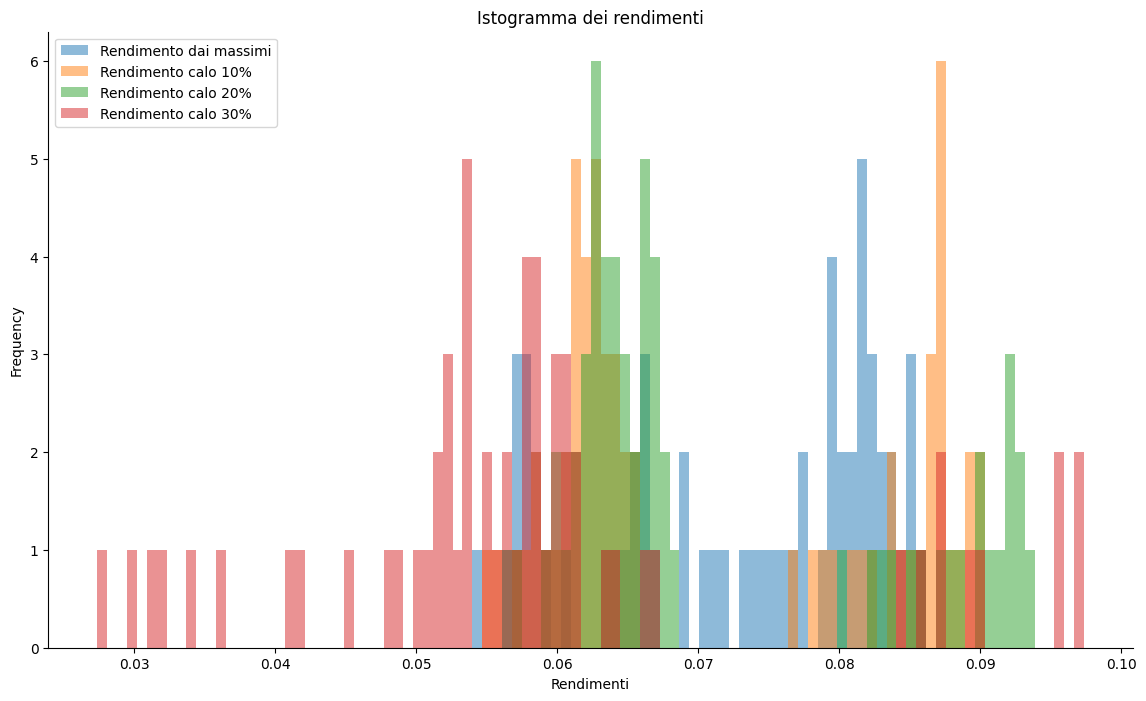

In [113]:
_df_18 = titolo[titolo['Rendimento dai massimi'].notna()].filter(regex='Rendimento',axis=1)
_df_18.plot(kind='hist', bins=100, title='Istogramma dei rendimenti', alpha=.5, figsize=(14,8))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Rendimenti')
plt.show()

In [114]:
titolo[(titolo['Rendimento dai massimi'].notna()) & (titolo['Capitale a scadenza dai massimi']<titolo['Capitale a scadenza calo 10%'])]

,MSCI WORLD,Massimo cumulativo,Check,Drawdown,Mesi al ribasso 10%,Mesi al ribasso 20%,Mesi al ribasso 30%,Rendimento dai massimi,Capitale a scadenza dai massimi,Rendimento calo 10%,Capitale a scadenza calo 10%,Rendimento calo 20%,Capitale a scadenza calo 20%,Rendimento calo 30%,Capitale a scadenza calo 30%
Date,,,,,,,,,,,,,,,
1972-02-01,116.900002,116.900002,True,0.0,21,27,29,0.081346,113833.070737,0.088153,119558.487848,0.092675,129596.838236,0.096699,142478.228587
1972-03-01,118.300003,118.300003,True,0.0,20,26,28,0.080512,111038.854827,0.087434,118024.469159,0.091929,127934.712280,0.095937,140651.668823
1972-04-01,119.699997,119.699997,True,0.0,19,25,27,0.081689,115003.159002,0.088837,123685.787954,0.093344,134069.565718,0.097349,147394.392272
1972-05-01,121.900002,121.900002,True,0.0,18,24,26,0.079889,108996.865367,0.087328,119394.416924,0.091795,129419.544212,0.095778,142283.993298
1972-08-01,123.699997,123.699997,True,0.0,15,21,23,0.074440,92656.427760,0.081419,103076.463001,0.085741,111736.937390,0.089652,122849.785269
1972-11-01,128.600006,128.600006,True,0.0,12,18,20,0.071835,85730.794713,0.079412,99279.190845,0.083660,107622.182953,0.087525,118327.586428
1972-12-01,130.699997,130.699997,True,0.0,11,17,19,0.072910,88522.566047,0.080855,104191.938113,0.085117,112946.247638,0.088978,124179.586347
1973-01-01,130.800003,130.800003,True,0.0,10,16,18,0.071351,84501.216519,0.079046,99537.521464,0.083263,107902.356736,0.087103,118635.822234
1973-02-01,131.500000,131.500000,True,0.0,9,15,17,0.070155,81541.402237,0.077777,96566.729996,0.081960,104682.956877,0.085781,115097.357593


In [115]:
output()

Media mesi dove attesa calo 10% garantisce capitale maggiore a scadenza di investire sui massimi: 9.86 mesi
Media mesi dove attesa calo 30% garantisce capitale maggiore a scadenza di investire sui massimi: 17.65 mesi
Media mesi dove attesa calo 30% garantisce capitale maggiore a scadenza di investire sui massimi: 22.3 mesi
Casistiche nelle quali aspettare un ribasso del 10% avrebbe garantito un capitale a scadenza maggiore: 60.66%
Casistiche nelle quali aspettare un ribasso del 20% avrebbe garantito un capitale a scadenza maggiore: 50.82%
Casistiche nelle quali aspettare un ribasso del 30% avrebbe garantito un capitale a scadenza maggiore: 16.39%


### applico risk free rate

In [116]:
rfr = 'TBILLS'
if rfr in titolo.columns:
    titolo.drop(rfr, axis=1, inplace=True)
titolo = titolo.merge(dati[[rfr]], how='left', left_index=True, right_index=True)

In [117]:
for m in titolo[(titolo['Check']) & (titolo.index<titolo.index.max()-relativedelta(months=12*periodo))].index:
  if pd.notnull(titolo.loc[m,'Mesi al ribasso 10%']):
    subdf1 = titolo[rfr][(titolo.index>=m) & (titolo.index<m+relativedelta(months=titolo.loc[m,'Mesi al ribasso 10%']))]
    subdf2 = titolo[ticker][(titolo.index>=m+relativedelta(months=titolo.loc[m,'Mesi al ribasso 10%'])) & (titolo.index<m+relativedelta(months=12*periodo))]
    r1 = subdf1.pct_change(1).mean()
    r2 = subdf2.pct_change(1).mean()
    d1 = relativedelta(m+relativedelta(months=titolo.loc[m,'Mesi al ribasso 10%']),m)
    d2 = relativedelta(m+relativedelta(months=12*periodo),(m+relativedelta(months=titolo.loc[m,'Mesi al ribasso 10%'])))
    c1 = capitale*(1+r1)**(d1.years*12+d1.months)
    c2 = c1*(1+r2)**(d2.years*12+d2.months)
    titolo.loc[m,'Capitale a scadenza calo 10%'] = c2

  if pd.notnull(titolo.loc[m,'Mesi al ribasso 20%']):
    subdf1 = titolo[rfr][(titolo.index>=m) & (titolo.index<m+relativedelta(months=titolo.loc[m,'Mesi al ribasso 20%']))]
    subdf2 = titolo[ticker][(titolo.index>=m+relativedelta(months=titolo.loc[m,'Mesi al ribasso 20%'])) & (titolo.index<m+relativedelta(months=12*periodo))]
    r1 = subdf1.pct_change(1).mean()
    r2 = subdf2.pct_change(1).mean()
    d1 = relativedelta(m+relativedelta(months=titolo.loc[m,'Mesi al ribasso 20%']),m)
    d2 = relativedelta(m+relativedelta(months=12*periodo),(m+relativedelta(months=titolo.loc[m,'Mesi al ribasso 20%'])))
    c1 = capitale*(1+r1)**(d1.years*12+d1.months)
    c2 = c1*(1+r2)**(d2.years*12+d2.months)
    titolo.loc[m,'Capitale a scadenza calo 20%'] = c2

  if pd.notnull(titolo.loc[m,'Mesi al ribasso 30%']):
    subdf1 = titolo[rfr][(titolo.index>=m) & (titolo.index<m+relativedelta(months=titolo.loc[m,'Mesi al ribasso 30%']))]
    subdf2 = titolo[ticker][(titolo.index>=m+relativedelta(months=titolo.loc[m,'Mesi al ribasso 30%'])) & (titolo.index<m+relativedelta(months=12*periodo))]
    r1 = subdf1.pct_change(1).mean()
    r2 = subdf2.pct_change(1).mean()
    d1 = relativedelta(m+relativedelta(months=titolo.loc[m,'Mesi al ribasso 30%']),m)
    d2 = relativedelta(m+relativedelta(months=12*periodo),(m+relativedelta(months=titolo.loc[m,'Mesi al ribasso 30%'])))
    c1 = capitale*(1+r1)**(d1.years*12+d1.months)
    c2 = c1*(1+r2)**(d2.years*12+d2.months)
    titolo.loc[m,'Capitale a scadenza calo 30%'] = c2

In [118]:
titolo[titolo['Rendimento dai massimi'].notna()].filter(regex='Capitale',axis=1).describe()

,Capitale a scadenza dai massimi,Capitale a scadenza calo 10%,Capitale a scadenza calo 20%,Capitale a scadenza calo 30%
count,61.000000,61.000000,61.000000,61.000000
mean,91260.360521,114613.110737,102278.681238,51359.141857
std,24955.817648,66494.854558,89485.691023,89194.944212
min,50842.739623,48696.434415,31727.074304,5037.734964
25%,69858.222235,59665.040028,45419.621287,9792.831820
50%,94359.648355,76716.382385,62160.471531,13196.427327
75%,113960.872174,158246.519510,150875.743458,17563.838468
max,128714.681519,280791.128197,369399.379485,337369.115763


In [119]:
output()

Media mesi dove attesa calo 10% garantisce capitale maggiore a scadenza di investire sui massimi: 13.52 mesi
Media mesi dove attesa calo 30% garantisce capitale maggiore a scadenza di investire sui massimi: 18.13 mesi
Media mesi dove attesa calo 30% garantisce capitale maggiore a scadenza di investire sui massimi: 22.3 mesi
Casistiche nelle quali aspettare un ribasso del 10% avrebbe garantito un capitale a scadenza maggiore: 68.85%
Casistiche nelle quali aspettare un ribasso del 20% avrebbe garantito un capitale a scadenza maggiore: 49.18%
Casistiche nelle quali aspettare un ribasso del 30% avrebbe garantito un capitale a scadenza maggiore: 16.39%


In [120]:
finale = titolo[titolo['Rendimento dai massimi'].notna()][['Capitale a scadenza dai massimi','Capitale a scadenza calo 10%','TBILLS']]
finale['Flag'] = finale['Capitale a scadenza dai massimi'] >= finale['Capitale a scadenza calo 10%']

In [121]:
df = finale[['TBILLS','Flag']]

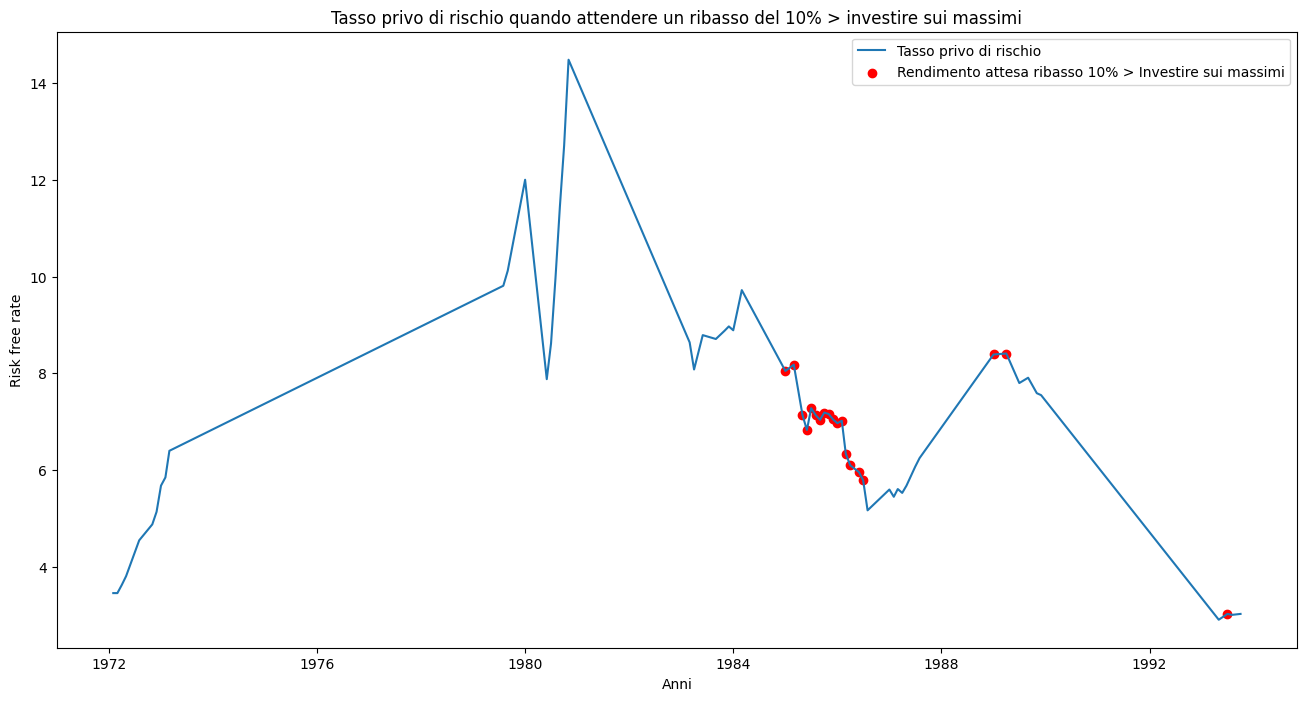

In [122]:
plt.figure(figsize=(16,8))
# Disegno della linea dei valori numerici
plt.plot(df.index, df['TBILLS'], label='Tasso privo di rischio', linestyle='-', marker='')

# Filtraggio dei valori dove 'Flag' è True e aggiunta di punti in corrispondenza
plt.scatter(df[df['Flag']].index, df[df['Flag']]['TBILLS'], color='red', label='Rendimento attesa ribasso 10% > Investire sui massimi')

# Aggiunta di etichette e legenda
plt.xlabel('Anni')
plt.ylabel('Risk free rate')
plt.title('Tasso privo di rischio quando attendere un ribasso del 10% > investire sui massimi')
plt.legend()

# Mostra il grafico
plt.show()